In [1]:
from principal_RBM_alpha import * 
import torch
import numpy as np
from time import time

In [5]:
device = 'cpu'

### Visualisation du préentrainement d'une RBM sur BinaryAlphaDigits

Nous allons visualiser l'entrainement de notre RBM sur la base de données BinaryAlphadigits. Dans un premier temps, on considère le préentrainement sur le nombre $8$

In [6]:
index = 8 
X  = lire_alpha_digit(index, device)

In [7]:
print('Les données contiennent:')
print(f'{X.size(0)} examples')
print(f'{X.size(1)} pixels')


Les données contiennent:
39 examples
320 pixels


In [10]:

p = X.size(1) #Nombre de pixels
qs = [10,100,500] #Test de différents nombres de neuronnes dans la couche cachée
batch_size = 10 #Le nombre de données par batch
lr = 0.01 #Le pas dans la gradient ascent
epochs = 1000 #Le nombre d'itérations (nombre de fois que le modèle voit toutes les données)
n_images = 2 #Nombre d'images à générer une fois la RBM entrainée
gibbs_iter = 1000 #Nombre d'itération dans le gibbs sampler pour générer une image

historique = []
images = []
times = []

for q in qs : 
    t0 = time()
    print(f'RBM avec {q} neuronnes')
    RBM = init_RBM(p, q, device)
    trained_RBM, history = train_RBM(X, RBM, epochs, lr, batch_size)
    historique.append(history)
    gen_images = generer_image_RBM(trained_RBM, gibbs_iter, n_images, plot = False)
    print('')
    times.append(time()-t0)
    images.append(gen_images)

RBM avec 10 neuronnes
EPOCH 0 - Reconstruction Error: 69.8120
EPOCH 50 - Reconstruction Error: 47.6708
EPOCH 100 - Reconstruction Error: 41.4183
EPOCH 150 - Reconstruction Error: 37.9494
EPOCH 200 - Reconstruction Error: 35.5407
EPOCH 250 - Reconstruction Error: 33.8458
EPOCH 300 - Reconstruction Error: 32.6665
EPOCH 350 - Reconstruction Error: 31.7738
EPOCH 400 - Reconstruction Error: 31.1250
EPOCH 450 - Reconstruction Error: 30.3510
EPOCH 500 - Reconstruction Error: 29.7591
EPOCH 550 - Reconstruction Error: 29.1842
EPOCH 600 - Reconstruction Error: 28.7395
EPOCH 650 - Reconstruction Error: 28.3506
EPOCH 700 - Reconstruction Error: 28.0096
EPOCH 750 - Reconstruction Error: 27.7025
EPOCH 800 - Reconstruction Error: 27.4911
EPOCH 850 - Reconstruction Error: 27.2300
EPOCH 900 - Reconstruction Error: 27.1217
EPOCH 950 - Reconstruction Error: 26.9477

RBM avec 100 neuronnes
EPOCH 0 - Reconstruction Error: 59.0698
EPOCH 50 - Reconstruction Error: 13.5505
EPOCH 100 - Reconstruction Error: 4.

In [11]:
print(f'Training time (GPU) 10 neuronnes: {times[0]:0.3f} seconds')
print(f'Training time (GPU) 100 neuronnes: {times[1]:0.3f} seconds')
print(f'Training time (GPU) 500 neuronnes: {times[2]:0.3f} seconds')

Training time (GPU) 10 neuronnes: 4.109 seconds
Training time (GPU) 100 neuronnes: 4.750 seconds
Training time (GPU) 500 neuronnes: 11.935 seconds


Le temps d'entraînement n'augmente presque pas avec le nombre de neuronnes. Cela est probablement du à l'utilisation du GPU par Pytorch

Text(0, 0.5, 'Reconstruction Error')

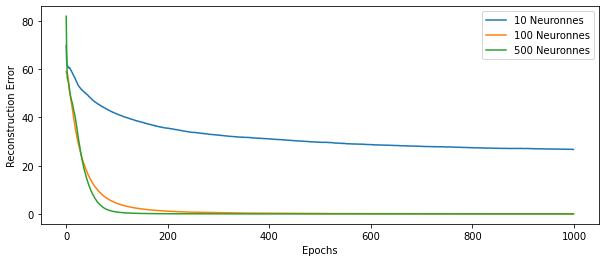

In [12]:
plt.figure(figsize = (10,4))
plt.plot(historique[0], label = '10 Neuronnes')
plt.plot(historique[1], label = '100 Neuronnes')
plt.plot(historique[2], label = '500 Neuronnes')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Reconstruction Error')


Nous voyons qu'une RBM avec 10 neuronnes ne convergent pas, tandis qu'une RBM avec 100 ou 500 neuronnes convergent vers une erreur de reconstruction très faible. Par ailleurs, l'utilisation de 500 neuronnes permet une convergence plus rapide.

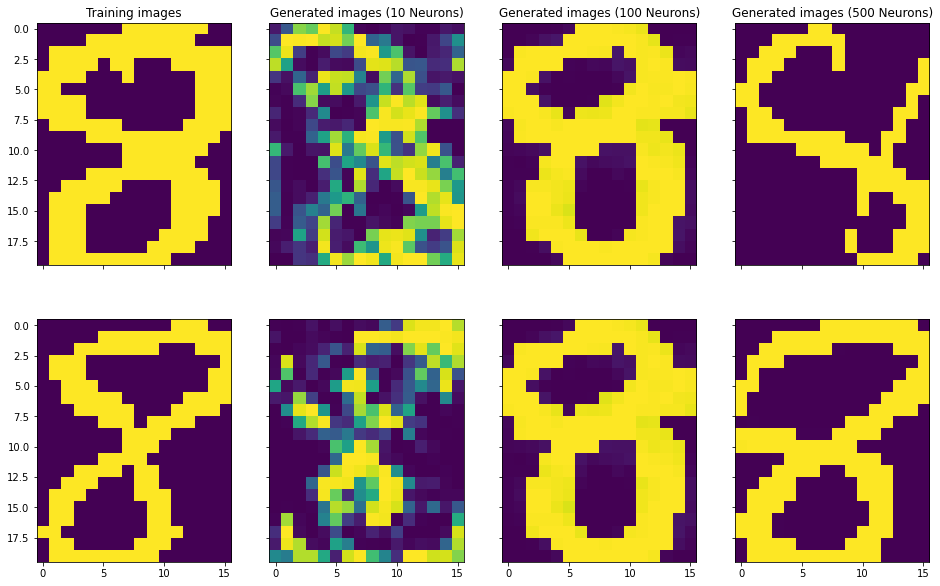

In [13]:
fig, ax = plt.subplots(nrows = 2, ncols = 4, sharex = True, sharey = True, figsize = (16,10))

ax[0,0].imshow(X[0].view(20,16).cpu().numpy())
ax[1,0].imshow(X[10].view(20,16).cpu().numpy())
ax[0,0].set_title('Training images')

ax[0,1].imshow(images[0][0])
ax[1,1].imshow(images[0][1])
ax[0,1].set_title('Generated images (10 Neurons)')

ax[0,2].imshow(images[1][0])
ax[1,2].imshow(images[1][1])
ax[0,2].set_title('Generated images (100 Neurons)')

ax[0,3].imshow(images[2][0])
ax[1,3].imshow(images[2][1])
_=ax[0,3].set_title('Generated images (500 Neurons)')


Les RBM avec 100 et 500 neuronnes génèrent des images aussi proche que celles utilisées pourt l'entraînement.

In [119]:
class DNNClass(object) : 
    def __init__(self) : 
        self.layers = []    

In [146]:
depth = 3
sizes = [(320, 100), (100, 100), (100, 100),(100, 100),(100, 100)]
def init_DNN(sizes, depth, device):
    DNN = DNNClass()
    for layers in range(depth):
        p,q = sizes[layers]
        DNN.layers.append(RBMClass(p, q, device))
    return DNN

In [147]:
def pretrain_DNN(x, DNN, epochs, lr, batch_size):
    depth = len(DNN.layers)
    for l in range(depth):
        DNN.layers[l] = train_RBM(x, DNN.layers[l], epochs, lr, batch_size)[0]
        x = entree_sortie_RBM(x, DNN.layers[l])
    return DNN
DNN = init_DNN(sizes, depth, device)
pretrained_DNN = pretrain_DNN(X, DNN, 1000, lr, batch_size)

EPOCH 0 - Reconstruction Error: 58.1498
EPOCH 50 - Reconstruction Error: 12.9619
EPOCH 100 - Reconstruction Error: 4.1984
EPOCH 150 - Reconstruction Error: 1.9055
EPOCH 200 - Reconstruction Error: 1.0404
EPOCH 250 - Reconstruction Error: 0.6396
EPOCH 300 - Reconstruction Error: 0.4321
EPOCH 350 - Reconstruction Error: 0.3092
EPOCH 400 - Reconstruction Error: 0.2334
EPOCH 450 - Reconstruction Error: 0.1812
EPOCH 500 - Reconstruction Error: 0.1451
EPOCH 550 - Reconstruction Error: 0.1187
EPOCH 600 - Reconstruction Error: 0.0986
EPOCH 650 - Reconstruction Error: 0.0831
EPOCH 700 - Reconstruction Error: 0.0709
EPOCH 750 - Reconstruction Error: 0.0614
EPOCH 800 - Reconstruction Error: 0.0535
EPOCH 850 - Reconstruction Error: 0.0472
EPOCH 900 - Reconstruction Error: 0.0419
EPOCH 950 - Reconstruction Error: 0.0374
EPOCH 0 - Reconstruction Error: 18.0143
EPOCH 50 - Reconstruction Error: 6.0451
EPOCH 100 - Reconstruction Error: 1.6893
EPOCH 150 - Reconstruction Error: 0.6088
EPOCH 200 - Reconst

In [154]:
def entree_sortie_DBN(x, DNN):
    depth = len(DNN.layers)
    for l in range(depth):
        x = entree_sortie_RBM(x, DNN.layers[l])
    return x

def sortie_entree_DBN(h, DNN):
    depth = len(DNN.layers)
    for l in range(depth - 1, -1, -1):
        h = sortie_entree_RBM(h, DNN.layers[l])
    return h

x = torch.randn(p)
o = torch.randn(100)
entree_sortie_DBN(X, pretrained_DNN).shape
sortie_entree_DBN(o, pretrained_DNN).shape

torch.Size([320])

In [162]:
def generer_image_DBN(pretrained_DNN, gibbs_iters, nb_images, plot = True):
    
    images = []
    depth = len(pretrained_DNN.layers)
    p = pretrained_DNN.layers[0].W.shape[0]
    
    for k in range(nb_images):  
        x = torch.randn(p)
        h = entree_sortie_DBN(x, pretrained_DNN)
            
        for i in range(gibbs_iters):
            v = sortie_entree_DBN(h, pretrained_DNN)
            h = entree_sortie_DBN(v, pretrained_DNN)
    
        img = v.view((20, 16)).detach().cpu().numpy()
        
        images.append(img)
        if plot : 
            plt.imshow(img)
            plt.show()
        
    return images

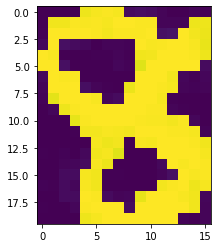

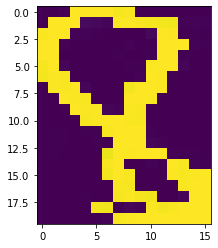

In [176]:
images = generer_image_DBN(pretrained_DNN, gibbs_iter, n_images)

In [218]:
from keras.datasets import mnist
(train_X, train_y), (test_X, test_y) = mnist.load_data()
train_X = train_X/255
test_X = test_X/255
train_X = torch.FloatTensor(train_X.reshape(-1,28*28))
test_X = torch.FloatTensor(test_X.reshape(-1,28*28))
n_classes = 10
train_X.shape

torch.Size([60000, 784])

### Sample

In [219]:
sample_size = 100
idx_train = torch.randperm(train_X.size(0))[:int(train_X.shape[0]*0.01)]
idx_test = torch.randperm(test_X.size(0))[:int(test_X.shape[0]*0.01)]
train_X = train_X[idx_train]
train_y = train_y[idx_train]
test_X = test_X[idx_test]
test_y = test_y[idx_test]
train_X.shape

torch.Size([600, 784])

In [220]:
def calcul_softmax(x, RBM):
    z = torch.mm(x, RBM.W) + RBM.b
    return torch.exp(z)/torch.sum(torch.exp(z))

In [384]:
def entree_sortie_reseau(x, DNN):
    depth = len(DNN.layers)
    Z = []
    Z.append(x)
    for l in range(depth):
        if l == depth - 1:
            Z.append(calcul_softmax(x, DNN.layers[l]))

        else:
            x = entree_sortie_RBM(x, DNN.layers[l])
            Z.append(x)
    
    return Z
                     


In [293]:
depth = 5
sizes = [(784, 10), (10, 5), (5, 5), (5, 5), (5, 10)]

DNN = init_DNN(sizes, depth, device)
pretrained_DNN = pretrain_DNN(train_X , DNN, 100, lr, batch_size)

EPOCH 0 - Reconstruction Error: 68.3804
EPOCH 50 - Reconstruction Error: 35.8886
EPOCH 0 - Reconstruction Error: 1.7163
EPOCH 50 - Reconstruction Error: 0.3671
EPOCH 0 - Reconstruction Error: 0.9261
EPOCH 50 - Reconstruction Error: 0.0748
EPOCH 0 - Reconstruction Error: 0.7662
EPOCH 50 - Reconstruction Error: 0.0585
EPOCH 0 - Reconstruction Error: 0.6609
EPOCH 50 - Reconstruction Error: 0.0107


In [385]:
X = entree_sortie_reseau(train_X[0], DNN)

In [395]:
len(X[0].shape)

1

In [394]:
torch.outer(X[0], c)

NameError: name 'c' is not defined

In [417]:
def retropropagation(data, true_labels, DNN, epochs, lr, batch_size):
    
    depth = len(DNN.layers)
    history_loss = []
    for epoch in range(epochs):
        print(epoch)
        batch_indices = torch.randperm(x.size(0))[:batch_size]
        batch = data[batch_indices]
        loss = 0
                
        for i in batch_indices:
            X = entree_sortie_reseau(data[i], DNN)
            y_pred = X[-1]
                
            y = torch.zeros(n_classes)
            y[true_labels[i]] = 1
            
            loss += -torch.sum(y * torch.log(y_pred)) 
                                                            
            for l in range(depth, 0, -1):
                
                if l == depth :
                    c = y_pred - y
                    if len(X[l-1].shape)==2:
                        print(c.shape)
                        grad_W_l = torch.outer(X[l-1][0], c[0])
                    else : 
                        grad_W_l = torch.outer(X[l-1], c)
                    grad_b_l = c
                    
                    DNN.layers[l-1].W -= lr * grad_W_l
                    DNN.layers[l-1].b -= lr * grad_b_l
                
                else:                    
                    c = DNN.layers[l-1].W @ c * X[l] * (1 - X[l])
                    
                    grad_W_l = torch.outer(X[l-1], c)
                    grad_b_l = c
                                        
                    DNN.layers[l-1].W -= lr * grad_W_l
                    DNN.layers[l-1].b -= lr * grad_b_l   
                    
        history_loss.append((1/batch_size) * loss)
    
    return DNN, history_loss



In [ ]:
def retropropagation(DNN, input_data, labels, nb_iter=100, lr=0.1, batch_size=32, verbose=True):

    DNN.append(init_RBM(DNN[0]['q'], nb_labels))

    n_layers = len(DNN)
    n = input_data.shape[0]
    for i in range(nb_iter):
        total_loss = 0
        total_accuracy = 0

        for batch in range(0, batch_size):
            x_batch = input_data[np.minimum(np.arange(batch * batch_size, (batch+1) * batch_size), n-1)]
            y_batch = labels[np.minimum(np.arange(batch * batch_size, (batch+1) * batch_size), n-1)]
            y_batch_ohe = to_one_hot(y_batch)

            # Forward
            pred = entree_sortie_reseau(DNN, x_batch)
            total_loss += cross_entropy(pred[n_layers], y_batch_ohe)
            total_accuracy += accuracy(pred[n_layers], y_batch_ohe)

            for l in range(n_layers):
                # Backward
                if l == 0:
                    delta = pred[n_layers] - y_batch_ohe
                else:
                    delta = dA * (pred[n_layers-l] * (1 - pred[n_layers-l]))
                dW = 1/batch_size * pred[n_layers-l-1].T.dot(delta)
                db = 1/batch_size * np.sum(delta, axis=0)
                dA = delta.dot(DNN[n_layers-l-1]['W'].T)
                
                # Update weights
                DNN[n_layers-l-1]['W'] -= lr * dW
                DNN[n_layers-l-1]['b'] -= lr * db

        if verbose:
            print("iteration %d \t : \t loss %.5f - accuracy %.5f" % (i, total_loss/batch_size, total_accuracy/batch_size))

    return DNN


In [418]:
def test_DNN(images, labels, DNN):
    
    accuracy = 0
    
    for i in range(len(labels)):
        y_pred = torch.argmax(entree_sortie_reseau(images[i], DNN)[-1])
        
        if y_pred == labels[i]:
            accuracy += 1
            
    return accuracy/len(labels)
        

In [419]:
depth = 3
shape_data = len(train_X[0])
sizes = [(shape_data, 100), (100, 100), (100, 10)]
DNN = init_DNN(sizes, depth, device)
batch_size = 10
lr = 0.01
epochs = 100
trained_DNN, history_loss = retropropagation(train_X, train_y, DNN, epochs, lr, batch_size)

0
torch.Size([1, 10])


RuntimeError: output with shape [10] doesn't match the broadcast shape [1, 10]

In [301]:
depth = 3
shape_data = len(train_X[0])
sizes = [(shape_data, 100), (100, 100), (100, 10)]
DNN_init = init_DNN(sizes, depth, device)
batch_size = 100
lr = 0.01
epochs = 3000
trained_DNN, history_loss = retropropagation(train_X, train_y, DNN_init, epochs, lr, batch_size)

0
torch.Size([1, 10])
[tensor([0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
      

/var/folders/l7/7hgrtkvs2lb9gr0tpjkdscbw0000gn/T/ipykernel_43519/593314840.py:12: FutureWarning: The input object of type 'Tensor' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'Tensor', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
  return np.array(Z, dtype='object')


RuntimeError: outer: Expected 1-D argument self, but got 2-D

In [250]:
v1

tensor([1., 2., 3., 4.])

In [251]:
v2

tensor([1., 2., 3.])